Found 143 images belonging to 10 classes.


C:\Users\pavan\AppData\Roaming\Python\Python310\site-packages\tensorflow\python\client\session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Found 52 images belonging to 10 classes.


C:\Users\pavan\AppData\Local\Temp\ipykernel_16188\4240768809.py:74: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(


Epoch 1/50
5/5 [==============================] - 5s 735ms/step - loss: 11.5965 - accuracy: 0.2238 - val_loss: 2.3591 - val_accuracy: 0.0962
Epoch 2/50
5/5 [==============================] - 4s 792ms/step - loss: 7.9999 - accuracy: 0.4685 - val_loss: 2.5512 - val_accuracy: 0.2115
Epoch 3/50
5/5 [==============================] - 4s 766ms/step - loss: 4.6561 - accuracy: 0.4685 - val_loss: 6.1113 - val_accuracy: 0.1346
Epoch 4/50
5/5 [==============================] - 4s 685ms/step - loss: 3.2552 - accuracy: 0.5035 - val_loss: 11.4294 - val_accuracy: 0.1154
Epoch 5/50
5/5 [==============================] - 4s 705ms/step - loss: 2.1456 - accuracy: 0.6014 - val_loss: 16.2712 - val_accuracy: 0.1154
Epoch 6/50
5/5 [==============================] - 4s 726ms/step - loss: 1.6199 - accuracy: 0.6573 - val_loss: 19.4198 - val_accuracy: 0.1154
Epoch 7/50
5/5 [==============================] - 4s 798ms/step - loss: 1.7228 - accuracy: 0.6573 - val_loss: 22.5602 - val_accuracy: 0.1154
Epoch 8/50
5/5 

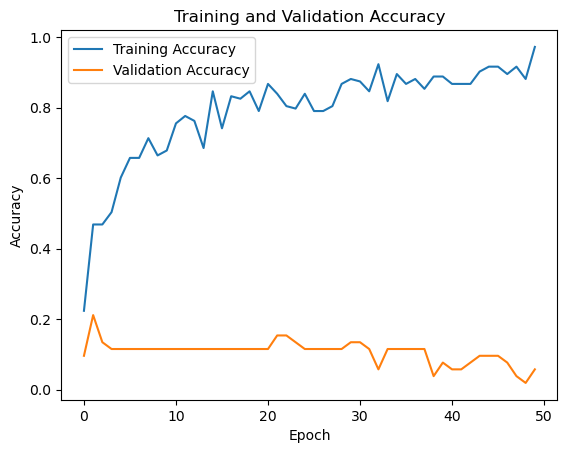

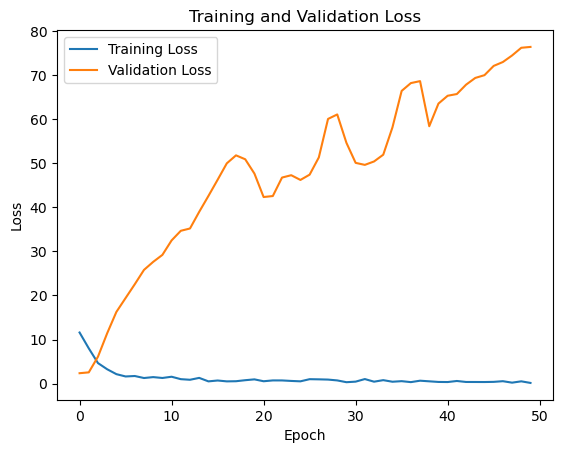

Accuracy: 0.9720279574394226
Saved model to disk


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

# Define the CNN model
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape=(128, 128, 3), activation='relu'))
classifier.add(BatchNormalization())

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a third convolutional layer
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units=256, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=10, activation='sigmoid'))

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    #scale the pixel value and divide 255
    
    shear_range=0.2,
    #keep one part of the image static and varies the another part
    zoom_range=0.2,
    horizontal_flip=True
    #to create mirror varsion and fliping image and adding variation
)

# Rescaling for test set
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training set
training_set = train_datagen.flow_from_directory(
    'C:\\Users\\pavan\\Downloads\\Plant-Leaf-Disease-Prediction-main\\Plant-Leaf-Disease-Prediction-main\\Dataset\\train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Load validation set
valid_set = test_datagen.flow_from_directory(
    'C:\\Users\\pavan\\Downloads\\Plant-Leaf-Disease-Prediction-main\\Plant-Leaf-Disease-Prediction-main\\Dataset\\val',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)



# Train the model
history = classifier.fit_generator(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=50,
    validation_data=valid_set,
    validation_steps=len(valid_set)
)

# Get the accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Get the final accuracy
final_accuracy = accuracy[-1]
print("Accuracy:", final_accuracy)

# Save the model
classifier.save("model.h5")
print("Saved model to disk")
